In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Dataloader import Dataloader
from RamdomForest import RamdomForest
from score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
parm = {
    'learning_rate' : 0.01,
    'n_estimators' : 5000,
    'max_depth' : [32],
    'num_leaves' : [256],
    'feature_fraction' : [0.9]
}

In [3]:
dataloader = Dataloader()
X_train, X_test, y_train, y_test = dataloader.prepare_train_data(df,size = 0.001)

In [4]:
ramdom_forest = RamdomForest()
model = ramdom_forest.train_LGBM(X_train, y_train, X_test, y_test,parm)

/home/mmdb/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['III_index_1000', 'III_index_10000', 'III_index_50', 'III_index_500', 'III_index_5000', 'II_index_1000', 'II_index_10000', 'II_index_50', 'II_index_500', 'II_index_5000', 'IV_index_1000', 'IV_index_10000', 'IV_index_50', 'IV_index_500', 'IV_index_5000', 'IX_index_1000', 'IX_index_10000', 'IX_index_50', 'IX_index_500', 'IX_index_5000', 'I_index_1000', 'I_index_10000', 'I_index_50', 'I_index_500', 'I_index_5000', 'VIII_index_1000', 'VIII_index_10000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_5000', 'VII_index_1000', 'VII_index_10000', 'VII_index_50', 'VII_index_500', 'VII_index_5000', 'VI_index_1000', 'VI_index_10000', 'VI_index_50', 'VI_index_500', 'VI_index_5000', 'V_index_1000', 'V_index_10000', 'V_index_50', 'V_index_500', 'V_index_5000', 'XIII_index_1000', 'XIII_index_10000', 'XIII_index_50', 'XIII_index_500', 'XIII_index_5

[100]	training's rmse: 515760	training's l1: 353839	valid_1's rmse: 510299	valid_1's l1: 383799
[200]	training's rmse: 298496	training's l1: 194776	valid_1's rmse: 269055	valid_1's l1: 190534
[300]	training's rmse: 223206	training's l1: 140136	valid_1's rmse: 201576	valid_1's l1: 128014
[400]	training's rmse: 188568	training's l1: 117551	valid_1's rmse: 183625	valid_1's l1: 112681
[500]	training's rmse: 166870	training's l1: 104767	valid_1's rmse: 183239	valid_1's l1: 110259
[600]	training's rmse: 151061	training's l1: 95866.3	valid_1's rmse: 178752	valid_1's l1: 106043
[700]	training's rmse: 138545	training's l1: 88820.8	valid_1's rmse: 176031	valid_1's l1: 103993
[800]	training's rmse: 128227	training's l1: 83064	valid_1's rmse: 173335	valid_1's l1: 101265
[900]	training's rmse: 119721	training's l1: 78287.3	valid_1's rmse: 170977	valid_1's l1: 99811.4
[1000]	training's rmse: 112573	training's l1: 74183.7	valid_1's rmse: 168484	valid_1's l1: 97985.1
[1100]	training's rmse: 106326	tra

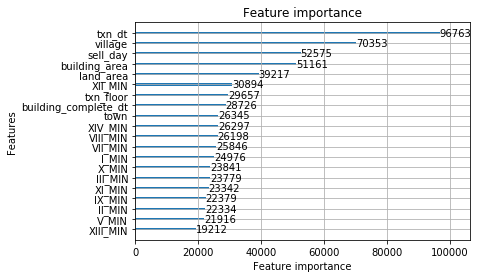

In [5]:
ax = model.plot_feature_important()

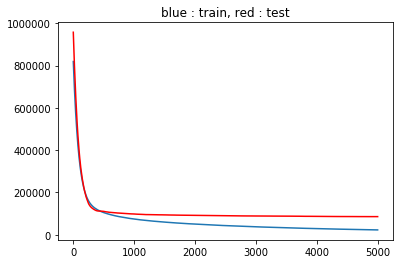

In [6]:
model.plot_loss()

In [7]:
y, y_true= model.predict(X_train,y_train)
hit_rate,point = score(y,y_true)
print(hit_rate)

first part : 9228.398163969578 last part: 0.9638431367659266
> 20 % : 0.012279291051026904
0.9228398163969578


In [8]:
y, y_true= model.predict(X_test,y_test)
hit_rate,point = score(y,y_true)

first part : 6333.333333333333 last part: 0.8755945796097723
> 20 % : 0.21666666666666667


In [9]:
hit_rate

0.6333333333333333

In [10]:
test_df = pd.read_csv("data/test.csv")
build_id = pd.read_csv("data/submit_test.csv")['building_id']
test_df = dataloader.prepare_test_data(test_df)
test_y, _= model.predict(test_df,y_test)
submit_df = pd.DataFrame(data={
    'building_id' : build_id,
    'total_price' : test_y
})
today = str(date.today())
submit_df.to_csv(f'submits/{today}_lightgbm.csv',index = False)